<a href="https://colab.research.google.com/github/jenluu-28/MATH167PS-Intro-to-Python-Programming-and-SQL/blob/main/Final_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering on Italian Regions Based on Olive Oil Acidic Components
<br>
Olive oil is a liquid fat created by crushing olives and extracting the oil by some mechanical means. The majority of olive oil originates from the Mediterranean Basin, which is a collective term for the regions —Europe, Asia, and Africa — that surround the Mediterranean Sea. In this particular data set, we investigate 572 olive oil samples that come from Italy (source: https://rdrr.io/cran/zenplots/man/olive.html). 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split #downloading modules for test and train
from sklearn import preprocessing #downloading module for scaling
from sklearn.metrics import silhouette_samples, silhouette_score #inmporting silhouette modules
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Data Preparation

In [ ]:
olive = pd.read_csv('oliveoil.csv')
olive.drop(columns = ['Unnamed: 0'], inplace = True)
olive.set_index([ 'macro.area', 'region'], inplace = True) #setting macro area and region as index
X_train, X_test = train_test_split(olive, test_size=0.3, random_state=12) #splitting data into test and train
                                                                #setting random state for reproducability

## Model Selection for Unscaled Data
<br>  

### Elbow method
Clustering from ranges 2 to 20 with each assigned a score. Inertia uses the differences between the groups.  The lower the sum of squares the lower the differences in each group.  Score is the opposite of inertia, which means the scores are negative. 


In [ ]:
scores = []
for i in range(2,20): #using ranges from 2 to 20
    kmeans = KMeans(n_clusters = i, random_state = 10) #selecting random state 10 so that all clusters start the same way
    kmeans.fit(X_train.values)
    scores.append(kmeans.inertia_) #this is just the opposite of inertia, 
                                        #which is the Sum Squares for the difference within groups
                        #the lower the sum of squares, the lower the differences within each group. 
                        #score will be negatvie
    
    

In [ ]:
scores2 = []
for i in range(2,20): #using ranges from 2 to 20
    kmeans = KMeans(n_clusters = i, random_state = 10) #selecting random state 10 so that all clusters start the same way
    kmeans.fit(X_train.values)
    scores2.append(kmeans.score(X_train.values)) #this is just the opposite of inertia, 
                                        #which is the Sum Squares for the difference within groups
                        #the lower the sum of squares, the lower the differences within each group. 
                        #score will be negatvie

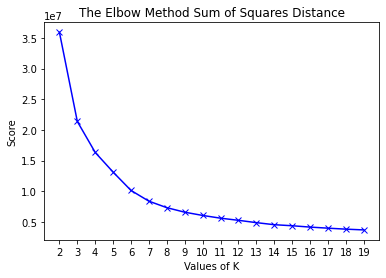

In [ ]:
K = np.arange(start =2, stop = 20, step = 1) #these are my x values
fig, ax = plt.subplots()
ax.plot(K, scores, 'bx-') #the list score from above is plotted against the number of clusters
ax.set(xlabel = 'Values of K', ylabel = 'Score', title = 'The Elbow Method Sum of Squares Distance')
ax.xaxis.set(ticks = K, ticklabels = K)

plt.show();

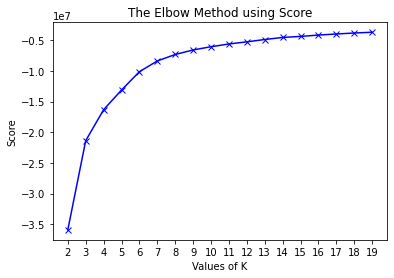

In [ ]:
K = np.arange(start =2, stop = 20, step = 1) #these are my x values
fig, ax = plt.subplots()
ax.plot(K, scores2, 'bx-') #the list score from above is plotted against the number of clusters
ax.set(xlabel = 'Values of K', ylabel = 'Score', title = 'The Elbow Method using Score')
ax.xaxis.set(ticks = K, ticklabels = K)

plt.show();

Elbow shows three clusters as appropriate

### Silhouette Score
Silhouette score ranges from 1 to -1 where high values show that point is well matched to its cluster and low values show that it is not well matched. 
silhouette coefficient of an i’th point

a(i) = The average distance of that point with all other points in the same clusters.
b(i) = The average distance of that point with all the points in the closest cluster to its cluster.
s(i) = silhouette coefficient or i’th point using below mentioned formula.

$$s(i) = \frac{b(i)-a(i)}{max(b(i),a(i))}$$
Silhouette score = $$1/n\sum_{i=1}^n s(i)$$

In [ ]:
silhouette_avg = []
for i in range(2,8):
    kmeans = KMeans(n_clusters = i, random_state = 10) #making sure that the same random state is used.
    label = kmeans.fit_predict(X_train.values)
    silhouette_avg.append(f' {i} test clusters = {silhouette_score(X_train.values, label)}')
silhouette_avg 

[' 2 test clusters = 0.545528770664765',
 ' 3 test clusters = 0.45567050207728466',
 ' 4 test clusters = 0.4236504613695804',
 ' 5 test clusters = 0.4483985885201784',
 ' 6 test clusters = 0.430668765503384',
 ' 7 test clusters = 0.4283381227604393']

Silhouette method recommends: 2 clusters

### Kmeans Clustering with 2 Clusters

In [ ]:
train = X_train.values
test = X_test.values

In [ ]:
kolive = KMeans(n_clusters = 2, random_state = 10) #maintaining same random state
kolive.fit(train)
olive_label = kolive.predict(test)

Display the total number of obsevations of each region in each cluster:

In [ ]:
X_test.reset_index(inplace = True)

In [ ]:
label_0 = X_test[olive_label == 0].groupby([ 'region'])['macro.area'].count()
label_0 = label_0.rename('C0')
label_0

region
Apulia.north    12
Apulia.south     1
Calabria         5
Liguria.east    17
Liguria.west    20
Sicily           4
Umbria           9
Name: C0, dtype: int64

In [ ]:
label_1 = X_test[olive_label == 1].groupby([ 'region'])['macro.area'].count()
label_1 = label_1.rename('C1')
label_1

region
Apulia.south       52
Calabria           11
Sardinia.coast     11
Sardinia.inland    29
Sicily              1
Name: C1, dtype: int64

In [ ]:
new_table = pd.concat([label_0, label_1], axis = 1)
new_table = pd.DataFrame(new_table)
new_table = new_table.fillna(0)
new_table

,C0,C1
Apulia.north,12.0,0.0
Apulia.south,1.0,52.0
Calabria,5.0,11.0
Liguria.east,17.0,0.0
Liguria.west,20.0,0.0
Sicily,4.0,1.0
Umbria,9.0,0.0
Sardinia.coast,0.0,11.0
Sardinia.inland,0.0,29.0


In [ ]:
label_acc = np.zeros_like(olive_label)
regions = list(new_table.index)
for region in regions:
    rv = list(new_table.loc[region])
    max_value = max(rv)
    max_index = rv.index(max_value)
    label_acc[X_test['region'] == region] = max_index
    

Accuracy Score:

In [ ]:
accuracy_score(label_acc, olive_label)

0.9593023255813954

Pseudo true clusters:

In [ ]:
clusters = []
cluster_label = []
for i in range(2):
    clusters.append(f' cluster {i} = {list(np.unique((X_test[label_acc == i].region)))}')
    cluster_label.append(list(np.unique((X_test[label_acc == i].region))))

clusters

[" cluster 0 = ['Apulia.north', 'Liguria.east', 'Liguria.west', 'Sicily', 'Umbria']",
 " cluster 1 = ['Apulia.south', 'Calabria', 'Sardinia.coast', 'Sardinia.inland']"]

Confusion Matrix:

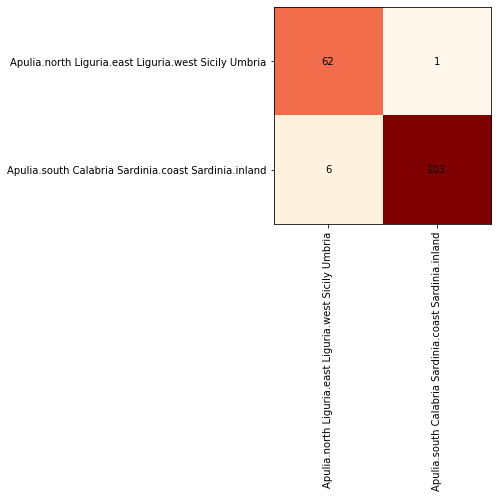

The percentage of data points that are correctly predicted for cluster 0 and cluster 1
on unscaled test data are 98.41 and 94.5 , respectively.


In [ ]:
mat = confusion_matrix(label_acc, olive_label) #x-axis is true label
fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd')
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))

for i in range(2):
    for j in range(2):
        text = ax.text(j,i,mat[i,j], ha = "center", va = "center", color = "k")
        

cluster0 = round((mat[0,0]/sum(mat[0,:]))*100,2)
cluster1 = round((mat[1,1]/sum(mat[1,:]))*100,2) 
        
ax.xaxis.set(ticklabels = [(' '.join(cluster_label[0])),(' '.join(cluster_label[1]))])
ax.yaxis.set(ticklabels = [(' '.join(cluster_label[0])),(' '.join(cluster_label[1]))])
ax.tick_params(axis = 'x', rotation = 90)
plt.show()   

print("""The percentage of data points that are correctly predicted for cluster 0 and cluster 1
on unscaled test data are""", cluster0, "and", cluster1, ", respectively.")

### Kmeans Clustering with 2 Clusters on Full Data


In [ ]:
X_full = olive.values

In [ ]:
kolive2 = KMeans(n_clusters = 2, random_state = 10) #maintaining same random state
kolive2.fit(X_full)
olive_label2 = kolive2.predict(X_full)

Display the total number of obsevations of each region in each cluster:

In [ ]:
olive.reset_index(inplace = True)

In [ ]:
label_0 = olive[olive_label2 == 0].groupby([ 'region'])['macro.area'].count()
label_0 = label_0.rename('C0')
label_0

region
Apulia.north         1
Apulia.south       204
Calabria            39
Liguria.west         1
Sardinia.coast      33
Sardinia.inland     65
Sicily              15
Name: C0, dtype: int64

In [ ]:
label_1 = olive[olive_label2 == 1].groupby([ 'region'])['macro.area'].count()
label_1 = label_1.rename('C1')
label_1

region
Apulia.north    24
Apulia.south     2
Calabria        17
Liguria.east    50
Liguria.west    49
Sicily          21
Umbria          51
Name: C1, dtype: int64

In [ ]:
new_table = pd.concat([label_0, label_1], axis = 1)
new_table = pd.DataFrame(new_table)
new_table = new_table.fillna(0)
new_table

,C0,C1
Apulia.north,1.0,24.0
Apulia.south,204.0,2.0
Calabria,39.0,17.0
Liguria.west,1.0,49.0
Sardinia.coast,33.0,0.0
Sardinia.inland,65.0,0.0
Sicily,15.0,21.0
Liguria.east,0.0,50.0
Umbria,0.0,51.0


Accuracy Score:

In [ ]:
label_acc = np.zeros_like(olive_label2)
regions = list(new_table.index)
for region in regions:
    rv = list(new_table.loc[region])
    max_value = max(rv)
    max_index = rv.index(max_value)
    label_acc[olive['region'] == region] = max_index
    

In [ ]:
accuracy_score(label_acc, olive_label2)

0.9370629370629371

Pseudo true clusters:

In [ ]:
clusters = []
cluster_label = []
for i in range(2):
    clusters.append(f' cluster {i} = {list(np.unique(list(olive[label_acc == i].region)))}')
    cluster_label.append(list(np.unique(list(olive[label_acc == i].region))))

clusters

[" cluster 0 = ['Apulia.south', 'Calabria', 'Sardinia.coast', 'Sardinia.inland']",
 " cluster 1 = ['Apulia.north', 'Liguria.east', 'Liguria.west', 'Sicily', 'Umbria']"]

Confusion Matrix:

The percentage of data points that are correctly predicted for cluster 0 and cluster 1 on the 
unscaled full data are 94.72 and 91.98 , respectively.


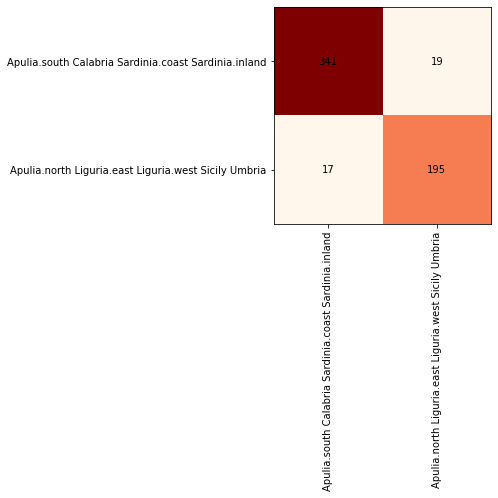

In [ ]:
mat = confusion_matrix(label_acc, olive_label2)#x-axis is true label
fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd')
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.xaxis.set(ticklabels = [(' '.join(cluster_label[0])),(' '.join(cluster_label[1]))])
ax.yaxis.set(ticklabels = [(' '.join(cluster_label[0])),(' '.join(cluster_label[1]))])
ax.tick_params(axis = 'x', rotation = 90)

 
cluster0 = round((mat[0,0]/sum(mat[0,:]))*100,2)
cluster1 = round((mat[1,1]/sum(mat[1,:]))*100,2) 


for i in range(2):
    for j in range(2):
        text = ax.text(j,i,mat[i,j], ha = "center", va = "center", color = "k");
        
               

print("""The percentage of data points that are correctly predicted for cluster 0 and cluster 1 on the 
unscaled full data are""", cluster0, "and", cluster1, ", respectively.")

### Kmeans clustering with 3 Clusters


In [ ]:
kolive = KMeans(n_clusters = 3, random_state = 10) #maintaining same random state
kolive.fit(train)
olive_label = kolive.predict(test)

Display the total number of obsevations of each region in each cluster:

In [ ]:
label_0 = X_test[olive_label == 0].groupby([ 'region'])['macro.area'].count()
label_0 = label_0.rename('C0')
label_0

region
Apulia.north    12
Calabria         2
Liguria.east    15
Liguria.west    15
Sicily           3
Umbria           9
Name: C0, dtype: int64

In [ ]:
label_1 = X_test[olive_label == 1].groupby([ 'region'])['macro.area'].count()
label_1 = label_1.rename('C1')
label_1

region
Apulia.south      47
Calabria           1
Sardinia.coast     8
Sicily             1
Name: C1, dtype: int64

In [ ]:
label_2 = X_test[olive_label == 2].groupby([ 'region'])['macro.area'].count()
label_2 = label_2.rename('C2')
label_2

region
Apulia.south        6
Calabria           13
Liguria.east        2
Liguria.west        5
Sardinia.coast      3
Sardinia.inland    29
Sicily              1
Name: C2, dtype: int64

In [ ]:
new_table = pd.concat([label_0, label_1, label_2], axis = 1)
new_table = pd.DataFrame(new_table)
new_table = new_table.fillna(0)
new_table

,C0,C1,C2
Apulia.north,12.0,0.0,0.0
Calabria,2.0,1.0,13.0
Liguria.east,15.0,0.0,2.0
Liguria.west,15.0,0.0,5.0
Sicily,3.0,1.0,1.0
Umbria,9.0,0.0,0.0
Apulia.south,0.0,47.0,6.0
Sardinia.coast,0.0,8.0,3.0
Sardinia.inland,0.0,0.0,29.0


Accuracy Score:

In [ ]:
label_acc = np.zeros_like(olive_label)
regions = list(new_table.index)
for region in regions:
    rv = list(new_table.loc[region])
    max_value = max(rv)
    max_index = rv.index(max_value)
    label_acc[X_test['region'] == region] = max_index
    

In [ ]:
accuracy_score(label_acc, olive_label)

0.877906976744186

Pseudo true clusters:

In [ ]:
clusters = []
cluster_label = []
for i in range(3):
    clusters.append(f' cluster {i} = {list(np.unique(list(X_test[label_acc == i].region)))}')
    cluster_label.append(list(np.unique(list(X_test[label_acc == i].region))))

clusters

[" cluster 0 = ['Apulia.north', 'Liguria.east', 'Liguria.west', 'Sicily', 'Umbria']",
 " cluster 1 = ['Apulia.south', 'Sardinia.coast']",
 " cluster 2 = ['Calabria', 'Sardinia.inland']"]

Confusion Matrix:

The percentage of data points that are correctly predicted for cluster 0, cluster 1, and cluster 2 on the unscaled test
data are 85.71 , 85.94 , and 93.33 , respectively.


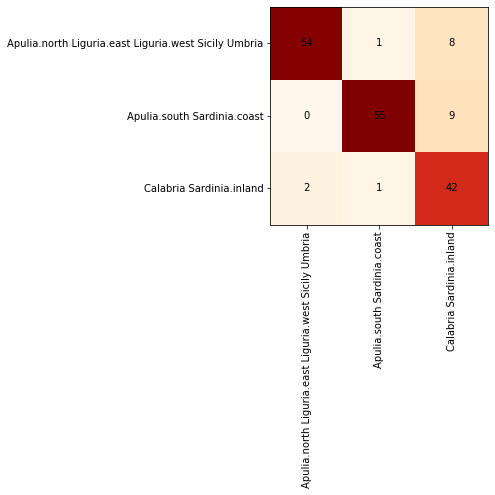

In [ ]:
mat = confusion_matrix(label_acc, olive_label) #x-axis is true label
fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd')
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))




for i in range(3):
    for j in range(3):
        text = ax.text(j,i,mat[i,j], ha = "center", va = "center", color = "k")

ax.xaxis.set(ticklabels = [(' '.join(cluster_label[0])),(' '.join(cluster_label[1])), (' '.join(cluster_label[2]))])
ax.yaxis.set(ticklabels = [(' '.join(cluster_label[0])),(' '.join(cluster_label[1])), (' '.join(cluster_label[2]))])
ax.tick_params(axis = 'x', rotation = 90)


cluster0 = round((mat[0,0]/sum(mat[0,:]))*100,2)
cluster1 = round((mat[1,1]/sum(mat[1,:]))*100,2) 
cluster2 = round((mat[2,2]/sum(mat[2,:]))*100,2) 


print("""The percentage of data points that are correctly predicted for cluster 0, cluster 1, and cluster 2 on the unscaled test
data are""", cluster0,",", cluster1,", and", cluster2, ", respectively.")

## Model Selection for Scaled Data
<br>  

### Elbow method


In [ ]:
scaler = preprocessing.StandardScaler().fit(train)
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

In [ ]:
score2 = []
for i in range(2,20):
    kmeans2 = KMeans(n_clusters = i, random_state = 10)
    kmeans2.fit(train_scaled)
    score2.append(kmeans2.inertia_) #this is just the opposite of inertia, which is the Sum Squares for the difference within groups
                    #the lower the sum of squares, the lower the differences within each group. 
                    #score will be negatvie
    

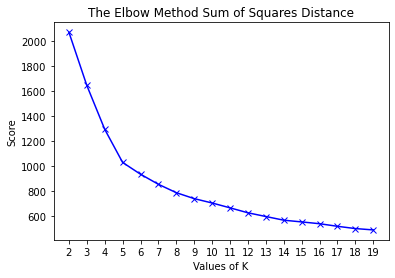

In [ ]:
K = np.arange(start =2, stop = 20, step = 1)
fig, ax = plt.subplots()
ax.plot(K, score2, 'bx-')
ax.set(xlabel = 'Values of K', ylabel = 'Score', title = 'The Elbow Method Sum of Squares Distance')
ax.xaxis.set(ticks = K, ticklabels = K)

plt.show();

Elbow method recommendation : 5 clusters

In [ ]:
silhouette_avg2 = []
for i in range(2,12):
    kmeans2 = KMeans(n_clusters = i, random_state = 10)
    label2 = kmeans2.fit_predict(train_scaled)
    silhouette_avg2.append(f' {i} test clusters = {silhouette_score(train_scaled, label2)}')
silhouette_avg2

[' 2 test clusters = 0.3289956974036788',
 ' 3 test clusters = 0.3196600130103744',
 ' 4 test clusters = 0.3458530724055741',
 ' 5 test clusters = 0.3826893262053109',
 ' 6 test clusters = 0.33767402174803096',
 ' 7 test clusters = 0.29965633142699827',
 ' 8 test clusters = 0.2925949246069399',
 ' 9 test clusters = 0.29538854374683593',
 ' 10 test clusters = 0.2705605289397162',
 ' 11 test clusters = 0.28161561359828885']

Silhouette method recommendation : 5 clusters

### Kmeans Clustering with 5 Clusters (Scaled)

In [ ]:
kolive2 = KMeans(n_clusters = 5, random_state = 10)
kolive2.fit(train_scaled)
olive_label2 = kolive2.predict(test_scaled)

Display the total number of obsevations of each region in each cluster:

In [ ]:
label_0 = X_test[olive_label2 == 0].groupby([ 'region'])['macro.area'].count()
label_0 = label_0.rename('C0')
label_0


region
Liguria.east     4
Liguria.west    20
Name: C0, dtype: int64

In [ ]:
label_1 = X_test[olive_label2 == 1].groupby([ 'region'])['macro.area'].count()
label_1 = label_1.rename('C1')
label_1

region
Apulia.south    52
Calabria         1
Sicily           1
Name: C1, dtype: int64

In [ ]:
label_2 = X_test[olive_label2 == 2].groupby([ 'region'])['macro.area'].count()
label_2 = label_2.rename('C2')
label_2

region
Liguria.east        3
Sardinia.coast     11
Sardinia.inland    29
Name: C2, dtype: int64

In [ ]:
label_3 = X_test[olive_label2 == 3].groupby([ 'region'])['macro.area'].count()
label_3 = label_3.rename('C3')
label_3

region
Apulia.north    3
Liguria.east    9
Umbria          9
Name: C3, dtype: int64

In [ ]:
label_4 = X_test[olive_label2 == 4].groupby([ 'region'])['macro.area'].count()
label_4 = label_4.rename('C4')
label_4

region
Apulia.north     9
Apulia.south     1
Calabria        15
Liguria.east     1
Sicily           4
Name: C4, dtype: int64

In [ ]:
new_table = pd.concat([label_0, label_1, label_2, label_3, label_4], axis = 1)
new_table = pd.DataFrame(new_table)
new_table = new_table.fillna(0)
new_table

,C0,C1,C2,C3,C4
Liguria.east,4.0,0.0,3.0,9.0,1.0
Liguria.west,20.0,0.0,0.0,0.0,0.0
Apulia.south,0.0,52.0,0.0,0.0,1.0
Calabria,0.0,1.0,0.0,0.0,15.0
Sicily,0.0,1.0,0.0,0.0,4.0
Sardinia.coast,0.0,0.0,11.0,0.0,0.0
Sardinia.inland,0.0,0.0,29.0,0.0,0.0
Apulia.north,0.0,0.0,0.0,3.0,9.0
Umbria,0.0,0.0,0.0,9.0,0.0


Accuracy Score:

In [ ]:
label_acc = np.zeros_like(olive_label2)
regions = list(new_table.index)
for region in regions:
    rv = list(new_table.loc[region])
    max_value = max(rv)
    max_index = rv.index(max_value)
    label_acc[X_test['region'] == region] = max_index
    

In [ ]:
accuracy_score(label_acc, olive_label2)

0.9186046511627907

Pseudo true clusters:

In [ ]:
clusters = []
cluster_label = []
for i in range(5):
    clusters.append(f' cluster {i} = {list(np.unique(list(X_test[label_acc == i].region)))}')
    cluster_label.append(list(np.unique(list(X_test[label_acc == i].region))))

clusters

[" cluster 0 = ['Liguria.west']",
 " cluster 1 = ['Apulia.south']",
 " cluster 2 = ['Sardinia.coast', 'Sardinia.inland']",
 " cluster 3 = ['Liguria.east', 'Umbria']",
 " cluster 4 = ['Apulia.north', 'Calabria', 'Sicily']"]

Confusion Matrix:

The percentage of data points that are correctly predicted for cluster 0, cluster 1, cluster 2, cluster 3,
and cluster 4 on the scaled test data are 100.0 , 98.11 , 100.0 , 69.23 , and 84.85 , respectively.


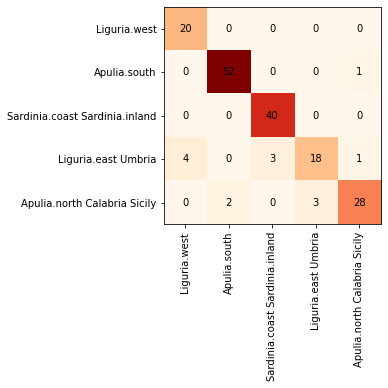

In [ ]:
mat = confusion_matrix(label_acc, olive_label2) #x-axis is true label
fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd')
ax.set_xticks(np.arange(5))
ax.set_yticks(np.arange(5))
ax.xaxis.set(ticklabels = [(' '.join(cluster_label[0])),(' '.join(cluster_label[1])), (' '.join(cluster_label[2])),\
                         (' '.join(cluster_label[3])), (' '.join(cluster_label[4]))])
ax.yaxis.set(ticklabels = [(' '.join(cluster_label[0])),(' '.join(cluster_label[1])), (' '.join(cluster_label[2])),\
                         (' '.join(cluster_label[3])), (' '.join(cluster_label[4]))])
ax.tick_params(axis = 'x', rotation = 90)
for i in range(5):
    for j in range(5):
        text = ax.text(j,i,mat[i,j], ha = "center", va = "center", color = "k");
        
cluster0 = round((mat[0,0]/sum(mat[0,:]))*100,2)
cluster1 = round((mat[1,1]/sum(mat[1,:]))*100,2) 
cluster2 = round((mat[2,2]/sum(mat[2,:]))*100,2) 
cluster3 = round((mat[3,3]/sum(mat[3,:]))*100,2) 
cluster4 = round((mat[4,4]/sum(mat[4,:]))*100,2) 

print("""The percentage of data points that are correctly predicted for cluster 0, cluster 1, cluster 2, cluster 3,
and cluster 4 on the scaled test data are""", cluster0,",", cluster1,",", cluster2,",", cluster3,", and", cluster4, ", respectively.")

### Kmeans Clustering with 5 Clusters (Scaled) on Full Data

In [ ]:
olive = pd.read_csv('oliveoil.csv')
olive.drop(columns = ['Unnamed: 0'], inplace = True)
olive.set_index([ 'macro.area', 'region'], inplace = True) #setting macro area and region as index

In [ ]:
X = olive.values
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [ ]:
olive_full = KMeans(n_clusters = 5, random_state = 10)
olive_full.fit(X_scaled)
olive_label_full = olive_full.predict(X_scaled)

Display the total number of obsevations of each region in each cluster:

In [ ]:
olive.reset_index(inplace = True)

In [ ]:
label_0 = olive[olive_label_full == 0].groupby([ 'region'])['macro.area'].count()
label_0 = label_0.rename('C0')
label_0

region
Liguria.east    10
Liguria.west    50
Name: C0, dtype: int64

In [ ]:
label_1 = olive[olive_label_full == 1].groupby([ 'region'])['macro.area'].count()
label_1 = label_1.rename('C1')
label_1 

region
Apulia.north    20
Apulia.south     2
Calabria        52
Liguria.east     5
Sicily          26
Name: C1, dtype: int64

In [ ]:
label_2 = olive[olive_label_full == 2].groupby([ 'region'])['macro.area'].count()
label_2 = label_2.rename('C2')
label_2

region
Apulia.south    204
Calabria          3
Sicily           10
Name: C2, dtype: int64

In [ ]:
label_3 = olive[olive_label_full == 3].groupby([ 'region'])['macro.area'].count()
label_3 = label_3.rename('C3')
label_3 

region
Liguria.east        5
Sardinia.coast     33
Sardinia.inland    65
Name: C3, dtype: int64

In [ ]:
label_4 = olive[olive_label_full == 4].groupby([ 'region'])['macro.area'].count()
label_4 = label_4.rename('C4')
label_4

region
Apulia.north     5
Calabria         1
Liguria.east    30
Umbria          51
Name: C4, dtype: int64

In [ ]:
new_table = pd.concat([label_0, label_1, label_2, label_3, label_4], axis = 1)
new_table = pd.DataFrame(new_table)
new_table = new_table.fillna(0)
new_table

,C0,C1,C2,C3,C4
Liguria.east,10.0,5.0,0.0,5.0,30.0
Liguria.west,50.0,0.0,0.0,0.0,0.0
Apulia.north,0.0,20.0,0.0,0.0,5.0
Apulia.south,0.0,2.0,204.0,0.0,0.0
Calabria,0.0,52.0,3.0,0.0,1.0
Sicily,0.0,26.0,10.0,0.0,0.0
Sardinia.coast,0.0,0.0,0.0,33.0,0.0
Sardinia.inland,0.0,0.0,0.0,65.0,0.0
Umbria,0.0,0.0,0.0,0.0,51.0


Accuracy Score:

In [ ]:
label_acc = np.zeros_like(olive_label_full)
regions = list(new_table.index)
for region in regions:
    rv = list(new_table.loc[region])
    max_value = max(rv)
    max_index = rv.index(max_value)
    label_acc[olive['region'] == region] = max_index
    

In [ ]:
accuracy_score(label_acc, olive_label_full)

0.9283216783216783

Pseudo true clusters:

In [ ]:
clusters = []
cluster_label = []
for i in range(5):
    clusters.append(f' cluster {i} = {list(np.unique(list(olive[label_acc == i].region)))}')
    cluster_label.append(list(np.unique(list(olive[label_acc == i].region))))

clusters


[" cluster 0 = ['Liguria.west']",
 " cluster 1 = ['Apulia.north', 'Calabria', 'Sicily']",
 " cluster 2 = ['Apulia.south']",
 " cluster 3 = ['Sardinia.coast', 'Sardinia.inland']",
 " cluster 4 = ['Liguria.east', 'Umbria']"]

Confusion Matrix:

The percentage of data points that are correctly predicted for cluster 0, cluster 1, cluster 2, cluster 3,
and cluster 4 on the scaled full data are 100.0 , 83.76 , 99.03 , 100.0 , and 80.2 , respectively.


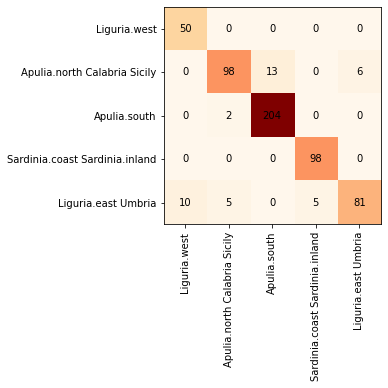

In [ ]:
mat = confusion_matrix(label_acc, olive_label_full)#x-axis is true label
areanames = [(' '.join(cluster_label[0])),(' '.join(cluster_label[1])), (' '.join(cluster_label[2])),\
                         (' '.join(cluster_label[3])), (' '.join(cluster_label[4]))]
fig, ax = plt.subplots()
ax.imshow(mat, cmap='OrRd')
ax.set_xticks(np.arange(5))
ax.set_yticks(np.arange(5))
ax.set_yticks(np.arange(5))
ax.xaxis.set(ticklabels = areanames)
ax.yaxis.set(ticklabels = areanames)
ax.tick_params(axis = 'x', rotation = 90)
for i in range(5):
    for j in range(5):
        text = ax.text(j,i,mat[i,j], ha = "center", va = "center", color = "k");
        
cluster0 = round((mat[0,0]/sum(mat[0,:]))*100,2)
cluster1 = round((mat[1,1]/sum(mat[1,:]))*100,2) 
cluster2 = round((mat[2,2]/sum(mat[2,:]))*100,2) 
cluster3 = round((mat[3,3]/sum(mat[3,:]))*100,2) 
cluster4 = round((mat[4,4]/sum(mat[4,:]))*100,2) 

print("""The percentage of data points that are correctly predicted for cluster 0, cluster 1, cluster 2, cluster 3,
and cluster 4 on the scaled full data are""", cluster0,",", cluster1,",", cluster2,",", cluster3,", and", cluster4, ", respectively.")

### Variables Exploration on 5 Cluster Model

<br>
Pairs plot that shows the pairwise relationship between 8 fatty acid components with the predicted label from the k-means model:

Text(0.5, 0.98, 'Pairs Plot')

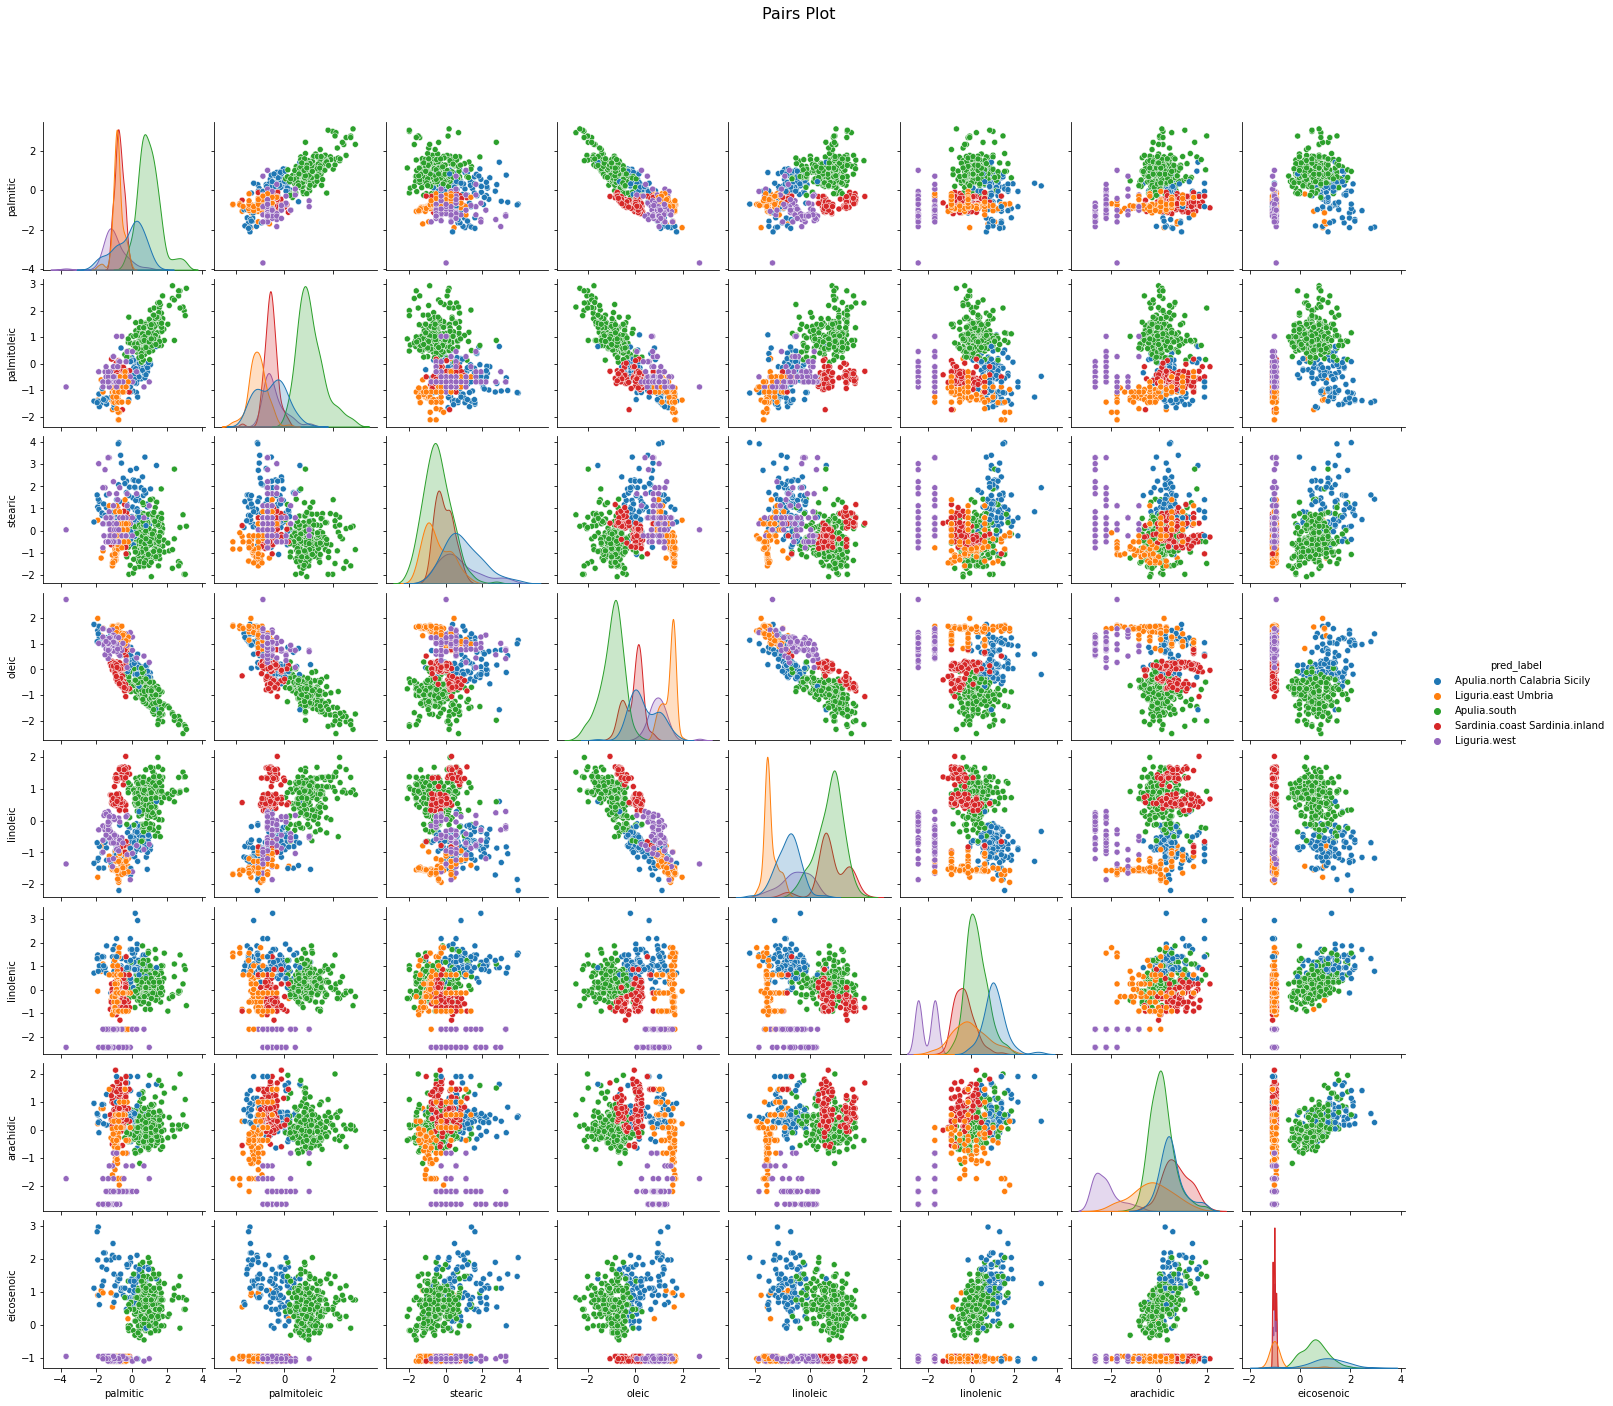

In [ ]:
# Seaborn visualization library
import seaborn as sns
pred_label = [areanames[i] for i in olive_label_full]
variables = ['palmitic', 'palmitoleic', 'stearic', 'oleic', 'linoleic', 'linolenic',
       'arachidic', 'eicosenoic']
data = pd.DataFrame(X_scaled, columns = variables)
data['pred_label'] = pred_label
# Create the pairplot

g = sns.pairplot(data, hue = 'pred_label')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Pairs Plot', fontsize=16)

PCA method for visualizing the data in low dimension and investigate the general influence of each variable on the separation of the clusters:

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)
principalComponents

array([[ 1.57674111,  1.49391431],
       [ 1.32384724,  1.07321218],
       [ 2.85159543,  1.89455677],
       ...,
       [ 2.83719585, -2.8067489 ],
       [ 2.65643799, -1.83388883],
       [ 3.39100633, -1.24625096]])

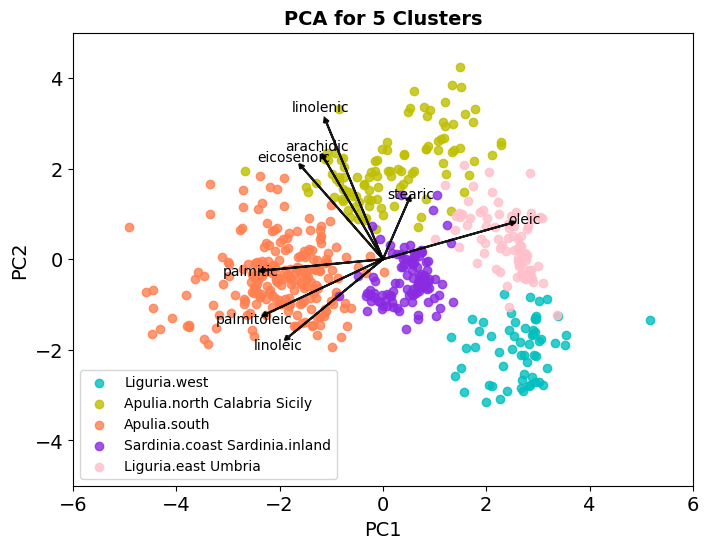

In [ ]:
def biplot(score, coeff , y, variables, areanames):
    '''
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
       variables: variable names
       areanames: area names
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(8,6), dpi=100)
    classes = np.unique(y)
    colors = ['c', 'y', 'coral', 'blueviolet', 'pink']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], label = areanames[s], alpha=0.8) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0]* 5, coeff[i,1]* 5, color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2, head_width=0.1, head_length=0.1)
        plt.text(coeff[i,0]* 5.55, coeff[i,1] * 5.55, variables[i], color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.legend()
    plt.title('PCA for 5 Clusters',fontweight="bold", size=14)
    plt.tick_params(axis='both', which='both', labelsize=14)
    

## PCA plotting
biplot(principalComponents, np.transpose(pca.components_), olive_label_full, variables, areanames)
plt.show()